## Baseline Model: KNN on face keypoints dataset

In [1]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots

sns.set(style="darkgrid")  # default style

from PIL import Image
from classifier.data_loader import load_data
from classifier.k_nearest_neighbor import KNearestNeighbor
from sklearn.metrics import mean_squared_error


In [2]:
# Load the data

X_train, X_val, y_train, y_val, X_test = load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")


Image array shape: (7049, 96, 96), Label array shape: (7049, 30)
Image array shape: (1783, 96, 96)
X_train shape: (5639, 96, 96)
y_train shape: (5639, 30)
X_val shape: (1410, 96, 96)
y_val shape: (1410, 30)
X_test shape: (1783, 96, 96)


In [3]:
# reshape the data to 2D

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print(X_train.shape, X_val.shape, X_test.shape)

(5639, 9216) (1410, 9216) (1783, 9216)


In [4]:
# trian a knn classifier with only nose location
knn_nose = KNearestNeighbor()
#nose is the 20 and 21 index
y_train_nose = y_train[:, 20:22]
y_val_nose = y_val[:, 20:22]

print(y_train_nose.shape, y_val_nose.shape)


(5639, 2) (1410, 2)


In [10]:
knn_nose.train(X_train, y_train_nose)
losses = []

for k in [1, 3, 5, 10, 20, 50]:
    y_pred_nose = knn_nose.predict(X_val, k=k)
    rmse = mean_squared_error(y_val_nose, y_pred_nose, squared=False)
    losses.append(rmse)

for k, rmse in zip([1, 3, 5, 10, 20, 50], losses):
    print(f"k: {k}, RMSE: {rmse:.2f}")

/home/rcao/repos_linux/ucb_mids_w207_project/classifier/k_nearest_neighbor.py:69: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared_sum)
/home/rcao/repos_linux/ucb_mids_w207_project/classifier/k_nearest_neighbor.py:69: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared_sum)
/home/rcao/repos_linux/ucb_mids_w207_project/classifier/k_nearest_neighbor.py:69: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared_sum)
/home/rcao/repos_linux/ucb_mids_w207_project/classifier/k_nearest_neighbor.py:69: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared_sum)
/home/rcao/repos_linux/ucb_mids_w207_project/classifier/k_nearest_neighbor.py:69: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared_sum)


k: 1, RMSE: 4.75
k: 3, RMSE: 4.30
k: 5, RMSE: 4.21
k: 10, RMSE: 4.20
k: 20, RMSE: 4.27
k: 50, RMSE: 4.47


/home/rcao/repos_linux/ucb_mids_w207_project/classifier/k_nearest_neighbor.py:69: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared_sum)


The interpretation is on average, the model is off by 6 pixels in the x direction and 6 pixels in the y direction. Considering the range of the data is 0 to 96, this is a pretty good result.

In [24]:
from face_data import FaceData
from face_data import Point


def plot(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, limit=2):

    if limit > X.shape[0]:
        limit = X.shape[0]

    X_3d = np.reshape(X, (X.shape[0], 96, 96))

    for i in range(1, limit + 1):
        # real_face = FaceData(y[i, :])
        plt.subplot(2, limit, i)
        plt.imshow(X_3d[i].astype("uint8"))
        plt.axis("off")

    plt.show()


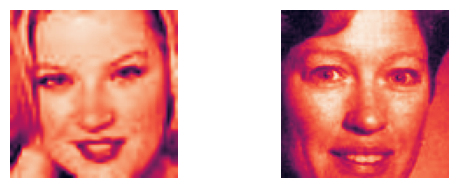

In [25]:
best_k = 10
y_pred_nose = knn_nose.predict(X_val, k=best_k)
plot(X_val, y_val_nose, y_pred_nose, limit=2)

In [6]:
# predicting all the points

# TODO: right now we have to drop all the data that have missing keypoints, but we should not need to do so?
def get_clean_data(X, y):
    clean = ~np.isnan(y).any(axis=1)
    return X[clean, :], y[clean, :]

X_train_clean, y_train_clean = get_clean_data(X_train, y_train)
X_val_clean, y_val_clean = get_clean_data(X_val, y_val)
print(X_train_clean.shape, y_train_clean.shape, X_val_clean.shape, y_val_clean.shape)

(1734, 9216) (1734, 30) (406, 9216) (406, 30)


In [11]:
# trian a knn classifier with all the points
knn = KNearestNeighbor()
knn.train(X_train_clean, y_train_clean)
losses = []

for k in [1, 3, 5, 10, 20, 50]:
    y_pred = knn.predict(X_val_clean, k=k)
    rmse = mean_squared_error(y_val_clean, y_pred, squared=False)
    losses.append(rmse)

for k, rmse in zip([1, 3, 5, 10, 20, 50], losses):
    print(f"k: {k}, RMSE: {rmse:.2f}")

k: 1, RMSE: 2.71
k: 3, RMSE: 2.41
k: 5, RMSE: 2.39
k: 10, RMSE: 2.38
k: 20, RMSE: 2.47
k: 50, RMSE: 2.62
